Exercise 1

In [22]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm 
import numpy as np

In [5]:
#Fetching data from website
url = 'https://raw.githubusercontent.com/umaimehm/Intro_to_AI/master/Lab1/Feature-Engineering/Example1/data_set.csv'
df = pd.read_csv(url)


head() function is used to visualize and test the data types inside the object. In short it will help you to know either your data set is valid or not.


In [6]:
df.head()

,name,age,weight,height
0,Shawna,45,44,5.9
1,Nathaniel,40,152,5.2
2,Elisabeth,15,242,5.1
3,Briana,41,43,5.5
4,Estella,43,58,4.9


In [7]:
df

,name,age,weight,height
0,Shawna,45,44,5.9
1,Nathaniel,40,152,5.2
2,Elisabeth,15,242,5.1
3,Briana,41,43,5.5
4,Estella,43,58,4.9
5,Lamont,43,59,5.4
6,Melinda,45,55,6.2
7,Shanna,48,248,6.5
8,Jasmine,50,55,7.1
9,Madge,52,58,12.5


"shape" attribute is used to return dimentionality of dataframe in form of tuple, In simple it shows all the rows and columns of the dataset.


In [8]:
df.shape

(14, 4)

We already imported the "matplotlib" library in start, we can use this library to form a visual distribution of data. (for example, histogram etc


<function matplotlib.pyplot.show(close=None, block=None)>

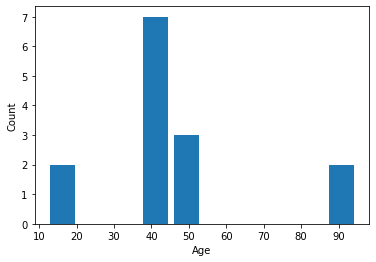

In [9]:
plt.hist(df.age, bins=10, rwidth=0.8)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show

Here comes the tricky part, we need to detect outliers, there are many ways to do that, domain knowlegde is import to detect outliers but if the data is big and complex then mostly we use different techniques such as percentile. in the example we have created a veriable "thresold_max" where we will try to detect outlier in age field using percentile technique (quantile()).

In [10]:
threshold_max = df['age'].quantile(0.90)
threshold_min = df['age'].quantile(0.10)

print("Threshold_max =",threshold_max,"\nThreshold_min =",threshold_min)

Threshold_max = 80.00000000000003 
Threshold_min = 22.5


In [11]:
df[df['age']<threshold_min]

,name,age,weight,height
2,Elisabeth,15,242,5.1
13,Mathew,12,89,5.5


In [12]:
df[df['age']>threshold_max]

,name,age,weight,height
10,Bethany,92,48,6.1
12,Antoine,95,61,2.2


Now, lets remove the the outliers and clean the data, as now we have max limit "thresold_max" and min limit "thresold_min".

In [13]:
new_df = df[(df['age']<threshold_max) & (df['age']>threshold_min)]
new_df.shape

(10, 4)

In [14]:
df

,name,age,weight,height
0,Shawna,45,44,5.9
1,Nathaniel,40,152,5.2
2,Elisabeth,15,242,5.1
3,Briana,41,43,5.5
4,Estella,43,58,4.9
5,Lamont,43,59,5.4
6,Melinda,45,55,6.2
7,Shanna,48,248,6.5
8,Jasmine,50,55,7.1
9,Madge,52,58,12.5


In [15]:
new_df

,name,age,weight,height
0,Shawna,45,44,5.9
1,Nathaniel,40,152,5.2
3,Briana,41,43,5.5
4,Estella,43,58,4.9
5,Lamont,43,59,5.4
6,Melinda,45,55,6.2
7,Shanna,48,248,6.5
8,Jasmine,50,55,7.1
9,Madge,52,58,12.5
11,Reid,44,278,5.6


Exercise 2
 

In [16]:
    # Import dataframe from file
    df = pd.read_csv("AB_NYC_2019.csv")
    df.shape

(48895, 16)

Text(0, 0.5, 'Count')

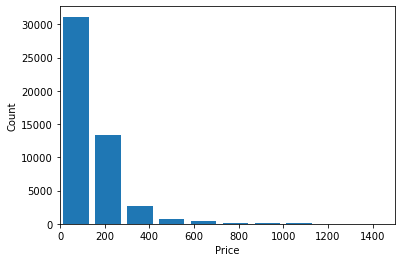

In [17]:
# Plot unclean dataframe

plt.hist(df.price, bins=70,rwidth=0.8)
plt.xlim([0,1500])
plt.xlabel('Price')
plt.ylabel('Count')

In [18]:
# Identify outliners. This can be done by using the percentile technique to limit the data.
upperlimit = 0.99
lowerlimit = 0.001

price_min, price_max = df.price.quantile([lowerlimit,upperlimit])

print("Maximum price for an apartment is",price_max,"$, and the minimum price for an apartment is",threshold_min,"$")

Maximum price for an apartment is 799.0 $, and the minimum price for an apartment is 22.5 $


In [19]:
# Cleanses the old dataframe. The new dataframe is restricted by percentile limits. 
new_df = df[(df['price']<price_max) & (df['price']>price_min)]

# Number of apartments removed from dataframe
print("The percentile limits removed a total of",df.shape[0]-new_df.shape[0],"apartments from the datasframe")

The percentile limits removed a total of 542 apartments from the datasframe


Text(0, 0.5, 'Count')

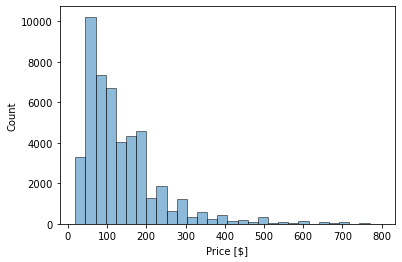

In [20]:
# Plotting the new dataframe in a histogram
plt.hist(new_df.price,edgecolor='black', alpha = 0.5, bins=30)
plt.xlabel('Price [$]')
plt.ylabel('Count')

Text(0, 0.5, 'Density')

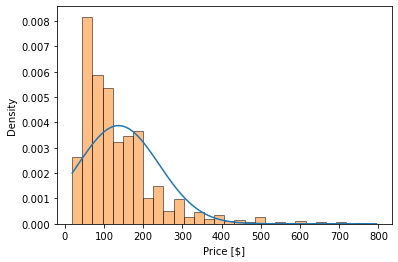

In [23]:
# Bellcurve of new dataframe

# Sorting values in new datafram, starting from min value to max value with 0.1 increments.
arange = np.arange(new_df.price.min(),new_df.price.max(),0.1) 

# Plots the bellcurve on top of the histogram. This can be done by setting "density = true" in plt.hist
plt.plot(arange, norm.pdf(arange,new_df.price.mean(),new_df.price.std()))
plt.hist(new_df.price, bins=30, edgecolor='black', alpha = 0.5, density = True)

plt.xlabel('Price [$]')
plt.ylabel('Density')